In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.translate import IBMModel2, AlignedSent
from nltk.corpus import comtrans
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import sentencepiece as spm
import matplotlib.pyplot as plt
import string
from string import digits

## English to Hindi


In [ ]:
file_path = "Data/hindi_english_parallel.csv"

In [ ]:
# Load Dataset
data = pd.read_csv(file_path)
print("Dataset Loaded:", data.shape)

<ipython-input-111-a9cabfc45cf1>:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Dataset Loaded: (1048575, 39)


In [ ]:
data = data[['english', 'hindi']]

In [ ]:
data.dropna(inplace=True)

In [ ]:
# data = data.sample(100000)

In [ ]:
data=data.reset_index(drop=True)

In [ ]:
data

,english,hindi
0,Give your application an accessibility workout,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें
1,Accerciser Accessibility Explorer,एक्सेर्साइसर पहुंचनीयता अन्वेषक
2,The default plugin layout for the bottom panel,निचले पटल के लिए डिफोल्ट प्लग-इन खाका
3,The default plugin layout for the top panel,ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका
4,A list of plugins that are disabled by default,उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से नि...
...,...,...
1042998,This signals that the focus is on the “Tool Of...,"यह संकेत है कि ध्यान केंद्रित पर ""ऑफसेट उपकरण""..."
1042999,Pressing the arrow keys immediately begins mov...,तुरंत तीर कुंजियों का उपयोग कर्सर हिल के इस बॉ...
1043000,I put the cursor on the length offset for tool 1,मैं लंबाई 1 उपकरण के लिए ऑफ़सेट पर कर्सर रखा
1043001,Press the [TOOL OFFSET MEASURE] key,[उपकरण ऑफ़सेट उपाय] कुंजी दबाएँ


### Dataset Analysis and Text Preprocessing

In [ ]:
# Data Cleaning
# Check for missing values and remove rows with missing English or Hindi sentences
data.dropna(subset=['english', 'hindi'], inplace=True)

In [ ]:
# Basic Descriptive Statistics
# Get the number of rows (sentence pairs) and basic statistics about sentence length
num_sentences = len(data)
print(f'Total number of sentence pairs: {num_sentences}')

Total number of sentence pairs: 1043003


In [ ]:
# Calculate sentence lengths in both English and Hindi
data['English_Length'] = data['english'].apply(lambda x: len(x.split()))
data['Hindi_Length'] = data['hindi'].apply(lambda x: len(x.split()))

In [ ]:
# Summary statistics for sentence lengths
print(data[['English_Length', 'Hindi_Length']].describe())

       English_Length  Hindi_Length
count    1.043003e+06  1.043003e+06
mean     1.017615e+01  1.145614e+01
std      1.492862e+01  1.688758e+01
min      0.000000e+00  1.000000e+00
25%      2.000000e+00  2.000000e+00
50%      5.000000e+00  5.000000e+00
75%      1.300000e+01  1.400000e+01
max      6.950000e+02  4.170000e+02


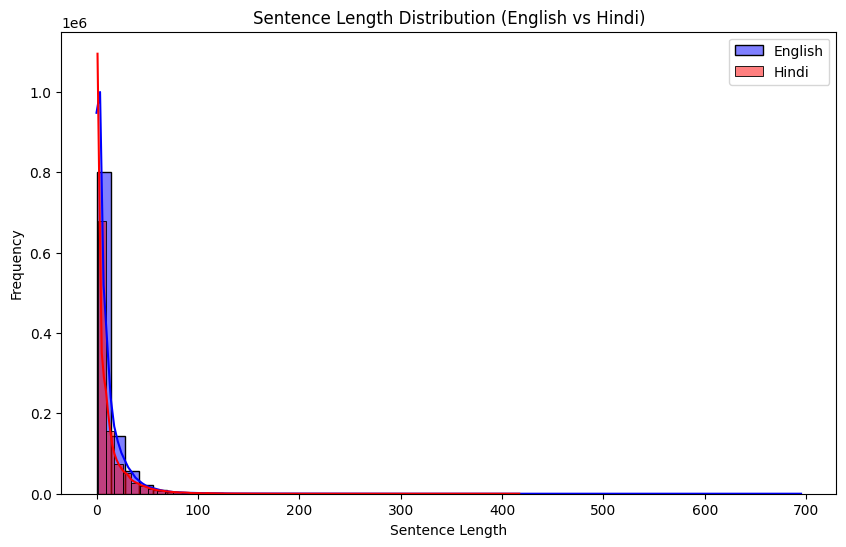

In [ ]:
# Sentence Length Distribution
# Plot the distribution of sentence lengths for English and Hindi
plt.figure(figsize=(10, 6))
sns.histplot(data['English_Length'], kde=True, color='blue', label='English', bins=50)
sns.histplot(data['Hindi_Length'], kde=True, color='red', label='Hindi', bins=50)
plt.legend()
plt.title('Sentence Length Distribution (English vs Hindi)')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Lowercase all characters
data['english']=data['english'].apply(lambda x: str(x))
data['hindi']=data['hindi'].apply(lambda x: str(x))
data['english']=data['english'].apply(lambda x: x.lower())
data['hindi']=data['hindi'].apply(lambda x: x.lower())

In [ ]:
# Remove quotes
data['english']=data['english'].apply(lambda x: re.sub("'", '', x))
data['hindi']=data['hindi'].apply(lambda x: re.sub("'", '', x))

In [ ]:
exclude = set(string.punctuation) # Set of all special characters

In [ ]:
# Remove all the special characters
data['english']=data['english'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
data['hindi']=data['hindi'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [ ]:
remove_digits = str.maketrans('', '', digits)

In [ ]:
# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
data['english']=data['english'].apply(lambda x: x.translate(remove_digits))
data['hindi']=data['hindi'].apply(lambda x: x.translate(remove_digits))

data['hindi'] = data['hindi'].apply(lambda x: re.sub("[२३०८१५७९४६]", "", x))

# Remove extra spaces
data['english']=data['english'].apply(lambda x: x.strip())
data['hindi']=data['hindi'].apply(lambda x: x.strip())
data['english']=data['english'].apply(lambda x: re.sub(" +", " ", x))
data['hindi']=data['hindi'].apply(lambda x: re.sub(" +", " ", x))

In [ ]:
data.dropna(inplace=True)
data=data.reset_index(drop=True)

In [ ]:
data

,english,hindi,English_Length,Hindi_Length
0,give your application an accessibility workout,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें,6,8
1,accerciser accessibility explorer,एक्सेर्साइसर पहुंचनीयता अन्वेषक,3,3
2,the default plugin layout for the bottom panel,निचले पटल के लिए डिफोल्ट प्लगइन खाका,8,7
3,the default plugin layout for the top panel,ऊपरी पटल के लिए डिफोल्ट प्लगइन खाका,8,7
4,a list of plugins that are disabled by default,उन प्लगइनों की सूची जिन्हें डिफोल्ट रूप से निष...,9,12
...,...,...,...,...
1042998,this signals that the focus is on the “tool of...,यह संकेत है कि ध्यान केंद्रित पर ऑफसेट उपकरण ब...,11,10
1042999,pressing the arrow keys immediately begins mov...,तुरंत तीर कुंजियों का उपयोग कर्सर हिल के इस बॉ...,12,15
1043000,i put the cursor on the length offset for tool,मैं लंबाई उपकरण के लिए ऑफ़सेट पर कर्सर रखा,11,10
1043001,press the tool offset measure key,उपकरण ऑफ़सेट उपाय कुंजी दबाएँ,6,5


In [ ]:
# Removing the rows that contains hindi sentences as it will just create noise in the dataset
def contains_Hindi(text):
    if isinstance(text,str):
        return bool(re.search(r'[\u0900-\u097F]',text))
    return False
data=data[~data['english'].apply(contains_Hindi)].reset_index(drop=True)

In [ ]:
# Removing the rows that contains English in hindi sentences as it will just create noise in the dataset
def contains_eng(text):
    if isinstance(text,str):
        return bool(re.search(r'[a-zA-Z]', text))
    return False
data=data[~data['hindi'].apply(contains_eng)].reset_index(drop=True)

In [ ]:
data.dropna(inplace=True)
data=data.reset_index(drop=True)

In [ ]:
data = data[data['English_Length']<=10]
data = data[data['Hindi_Length']<=10]


In [ ]:
data.dropna(inplace=True)
data=data.reset_index(drop=True)

In [ ]:
data

,english,hindi,English_Length,Hindi_Length
0,give your application an accessibility workout,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें,6,8
1,accerciser accessibility explorer,एक्सेर्साइसर पहुंचनीयता अन्वेषक,3,3
2,the default plugin layout for the bottom panel,निचले पटल के लिए डिफोल्ट प्लगइन खाका,8,7
3,the default plugin layout for the top panel,ऊपरी पटल के लिए डिफोल्ट प्लगइन खाका,8,7
4,highlight duration,अवधि को हाइलाइट रकें,2,4
...,...,...,...,...
595818,below the tool offsets are the work zero offsets,उपकरण ऑफसेट नीचे शून्य ऑफसेट काम कर रहे हैं,9,9
595819,along the bottom we have the spindle informati...,नीचे के साथ हम तकला जानकारी बॉक्स है,9,8
595820,here to the right is the “tool management” inf...,यहाँ है ठीक है उपकरण प्रबंधन जानकारी है,9,8
595821,press the tool offset measure key,उपकरण ऑफ़सेट उपाय कुंजी दबाएँ,6,5


In [ ]:
# Sentence Alignment Check (Basic Inspection)
# Check for sentence alignment issues by printing a few mismatched pairs
misaligned_pairs = data[data['English_Length'] != data['Hindi_Length']]
print("Mismatched sentence pairs:\n\n", misaligned_pairs.head())

Mismatched sentence pairs:

                                           english  \
0  give your application an accessibility workout   
2  the default plugin layout for the bottom panel   
3     the default plugin layout for the top panel   
4                              highlight duration   
6                          highlight border color   

                                             hindi  English_Length  \
0  अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें               6   
2             निचले पटल के लिए डिफोल्ट प्लगइन खाका               8   
3              ऊपरी पटल के लिए डिफोल्ट प्लगइन खाका               8   
4                             अवधि को हाइलाइट रकें               2   
6             सीमांत बोर्डर के रंग को हाइलाइट करें               3   

   Hindi_Length  
0             8  
2             7  
3             7  
4             4  
6             7  


In [ ]:
# Split the dataset into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Tokenization and preprocessing
def preprocess_data(data):
    """
    Preprocesses the English-Hindi data into tokenized sentences.
    """
    english_sentences = data['english'].astype(str).tolist()
    hindi_sentences = data['hindi'].astype(str).tolist()
    return english_sentences, hindi_sentences

train_eng, train_hin = preprocess_data(train_data)
test_eng, test_hin = preprocess_data(test_data)

### **STATISTICAL MACHINE TRANSLATION (SMT) with IBM Model 2 from NLTK**
---

### IBM Model 2 for Machine Translation

**IBM Model 2** is a statistical machine translation model that builds upon **IBM Model 1** by incorporating **word reordering** into the translation process. It is part of the IBM alignment models introduced in the early 1990s to address the alignment problem in parallel corpora (bilingual text).

#### How it Works:
1. **Word Alignment**: IBM Model 2 aligns words between a source and target sentence probabilistically. For instance, in translating an English sentence to a Hindi sentence, the model determines the likelihood that a word in English aligns with a specific word in Hindi.

2. **Reordering**: IBM Model 2 introduces a **distortion probability** to account for word order differences between source and target languages. This allows the model to reorder words during translation, which improves over the naive assumptions of IBM Model 1.

3. **Translation Probability**:
   - A probability distribution \( t(f|e) \) is learned, where \( f \) is a target language word, and \( e \) is a source language word.
   - \( t(f|e) \) represents the likelihood of translating \( e \) to \( f \).

4. **Distortion Probability**:
   - A function \( d(j|i, l_s, l_t) \) calculates the probability that a word at position \( i \) in the source sentence aligns to position \( j \) in the target sentence.
   - \( l_s \) and \( l_t \) are the lengths of the source and target sentences, respectively.

#### Steps in Training IBM Model 2:
1. **Initialization**: The model starts with uniform probabilities or the output from IBM Model 1.
2. **Expectation-Maximization (EM) Algorithm**:
   - **Expectation Step**: Compute expected counts of word alignments and distortions using current probabilities.
   - **Maximization Step**: Update the translation probabilities \( t(f|e) \) and distortion probabilities \( d(j|i) \) using the expected counts.
3. **Iteration**: Repeat the EM steps over several iterations to improve alignment and probabilities.

---

#### Benefits of IBM Model 2:
- **Improved Word Reordering**: Unlike IBM Model 1, IBM Model 2 handles reordering, which is essential for languages with different syntactic structures (e.g., English-Hindi).
- **Probabilistic Alignment**: By learning probabilities, the model can align words even when they do not share direct one-to-one correspondence.

---

#### Example Flow:
1. **Input**: A parallel corpus with aligned sentences in English and Hindi.
2. **Training**: The model learns \( t(f|e) \) and \( d(j|i) \) over multiple iterations.
3. **Translation**: Given a new English sentence, the model uses the learned probabilities to align and reorder words into Hindi.

IBM Model 2 provides a foundational approach to statistical machine translation and serves as a stepping stone to more advanced alignment models like IBM Model 3 and 4.

In [ ]:
print("\n--- Running Statistical Machine Translation (IBM Model 2) ---")

nltk.download('comtrans')  # Pretrained aligned data for demonstration


--- Running Statistical Machine Translation (IBM Model 2) ---


[nltk_data] Downloading package comtrans to /root/nltk_data...
[nltk_data]   Package comtrans is already up-to-date!


True

In [ ]:
# Prepare aligned sentences
aligned_sentences = [AlignedSent(e.split(), h.split()) for e, h in zip(train_eng, train_hin)]

In [ ]:
aligned_sentences[:10]

[AlignedSent(['hover'], ['कतराना'], Alignment([])),
 AlignedSent(['by', 'the', 'earth', 'and', 'him', 'who', 'spread', 'it', 'forth'], ['और', 'धरती', 'और', 'जैसा', 'कुछ', 'उसे', 'बिछाया'], Alignment([])),
 AlignedSent(['backup', 'all'], ['सभी', 'बैकअप', 'करें'], Alignment([])),
 AlignedSent(['fracas'], ['खिटपिट'], Alignment([])),
 AlignedSent(['disenchanted'], ['वैरागी'], Alignment([])),
 AlignedSent(['pisces', 'the', 'fishes'], ['मीन', 'राशि'], Alignment([])),
 AlignedSent(['anemone'], ['एनेमॉन'], Alignment([])),
 AlignedSent(['lodicules', 'are', 'rudimentary', 'perianth'], ['लोडिक्यूल', 'अल्प', 'विकसित', 'आरंभिक', 'दलपुंज', 'होते', 'हैं।'], Alignment([])),
 AlignedSent(['the', 'gdm', 'user', 'should', 'not', 'be', 'root', 'aborting'], ['जीडीएम', 'उपयोक्ता', 'रूट', 'नहीं', 'हो', 'सकता', 'छोड़', 'रहा', 'है'], Alignment([])),
 AlignedSent(['united', 'states', 'of', 'america'], ['संयुक्त', 'राज्य', 'अमेरिका'], Alignment([]))]

In [ ]:
print(f"Total sentences {len(aligned_sentences)}")

Total sentences 476658


In [ ]:
# Train IBM Model 2
ibm_model = IBMModel2(aligned_sentences, 15)  # 15 iterations

In [ ]:
# Align and Translate a test sentence
sample_eng = test_eng[10].split()
alignment = ibm_model.translation_table
translated_sentence = [max(alignment[word], key=alignment[word].get, default='') for word in sample_eng]
print("Original:", test_eng[10])
print("Translation (IBM Model 2):", ' '.join(translated_sentence))

Original: category suriname
Translation (IBM Model 2): श्रेणीःपुनः सुरिनाम


In [ ]:
import pickle

In [ ]:
import pickle
import collections

# Function to recursively convert defaultdict to a normal dictionary
def convert_to_dict(obj):
    if isinstance(obj, collections.defaultdict):
        return {key: convert_to_dict(value) for key, value in obj.items()}
    elif isinstance(obj, dict):
        return {key: convert_to_dict(value) for key, value in obj.items()}
    elif isinstance(obj, float):  # Ensure floats are stored properly
        return float(obj)
    else:
        return obj  # Keep values like int or str as they are

# Extract translation and alignment probabilities in a serializable format
def save_ibm_model(ibm_model, filename="ibm_model2_eng_hindi.pkl"):
    # Convert translation table
    translation_table = convert_to_dict(ibm_model.translation_table)

    # Convert alignment table
    alignment_table = convert_to_dict(ibm_model.alignment_table)

    model_data = {
        "translation_table": translation_table,
        "alignment_table": alignment_table
    }

    with open(filename, "wb") as f:
        pickle.dump(model_data, f)

# Save the trained model
save_ibm_model(ibm_model)


In [ ]:
# Load the trained model from file
def load_ibm_model(filename="ibm_model2_eng_hindi.pkl"):
    with open(filename, "rb") as f:
        model_data = pickle.load(f)
    return model_data["translation_table"]

# Function to translate English text using the loaded translation table
def translate_text(english_text, translation_table):
    words = english_text.lower().split()  # Tokenize input text
    translated_words = []

    for word in words:
        if word in translation_table:
            translations = translation_table[word]
            if translations:
                best_translation = max(translations, key=translations.get)  # Most probable word
                translated_words.append(best_translation)
            else:
                translated_words.append(word)  # Keep original word if no translation found
        else:
            translated_words.append(word)  # Keep original word if not in vocabulary

    return " ".join(translated_words)  # Return translated sentence


In [ ]:

# Function to get user input and generate translation
# Load the trained translation table
translation_table = load_ibm_model()

# Get user input
english_text = input("Enter English text: ")

# Generate translation
translated_text = translate_text(english_text, translation_table)

print("Translated:", translated_text)


Enter English text: hello
Translated: नमस्कार।


## English to Spanish


In [ ]:
file_path = "Data/english_spanish_parallel.csv"

In [ ]:
# Load Dataset
data = pd.read_csv(file_path)
print("Dataset Loaded:", data.shape)

Dataset Loaded: (118964, 2)


In [ ]:
data.dropna(inplace=True)
data=data.reset_index(drop=True)

In [ ]:
data

,english,spanish
0,Go.,Ve.
1,Go.,Vete.
2,Go.,Vaya.
3,Go.,Váyase.
4,Hi.,Hola.
...,...,...
118959,There are four main causes of alcohol-related ...,Hay cuatro causas principales de muertes relac...
118960,There are mothers and fathers who will lie awa...,Hay madres y padres que se quedan despiertos d...
118961,A carbon footprint is the amount of carbon dio...,Una huella de carbono es la cantidad de contam...
118962,Since there are usually multiple websites on a...,Como suele haber varias páginas web sobre cual...


### Dataset Analysis and Text Preprocessing

In [ ]:
# Data Cleaning
# Check for missing values and remove rows with missing English or Hindi sentences
data.dropna(subset=['english', 'spanish'], inplace=True)

In [ ]:
# Basic Descriptive Statistics
# Get the number of rows (sentence pairs) and basic statistics about sentence length
num_sentences = len(data)
print(f'Total number of sentence pairs: {num_sentences}')

Total number of sentence pairs: 118964


In [ ]:
# Calculate sentence lengths in both English and Hindi
data['English_Length'] = data['english'].apply(lambda x: len(x.split()))
data['spanish_Length'] = data['spanish'].apply(lambda x: len(x.split()))

In [ ]:
# Summary statistics for sentence lengths
print(data[['English_Length', 'spanish_Length']].describe())

       English_Length  spanish_Length
count   118964.000000   118964.000000
mean         6.310363        6.083874
std          2.611586        2.764453
min          1.000000        1.000000
25%          4.000000        4.000000
50%          6.000000        6.000000
75%          8.000000        7.000000
max         47.000000       49.000000


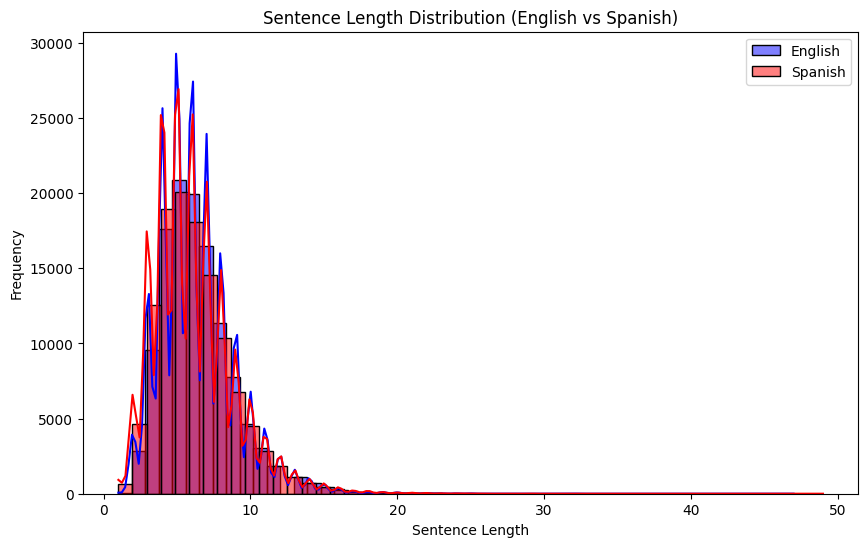

In [ ]:
# Sentence Length Distribution
# Plot the distribution of sentence lengths for English and Hindi
plt.figure(figsize=(10, 6))
sns.histplot(data['English_Length'], kde=True, color='blue', label='English', bins=50)
sns.histplot(data['spanish_Length'], kde=True, color='red', label='Spanish', bins=50)
plt.legend()
plt.title('Sentence Length Distribution (English vs Spanish)')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Lowercase all characters
data['english']=data['english'].apply(lambda x: str(x))
data['spanish']=data['spanish'].apply(lambda x: str(x))
data['english']=data['english'].apply(lambda x: x.lower())
data['spanish']=data['spanish'].apply(lambda x: x.lower())

In [ ]:
# Remove quotes
data['english']=data['english'].apply(lambda x: re.sub("'", '', x))
data['spanish']=data['spanish'].apply(lambda x: re.sub("'", '', x))

In [ ]:
exclude = set(string.punctuation) # Set of all special characters

In [ ]:
# Remove all the special characters
data['english']=data['english'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
data['spanish']=data['spanish'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [ ]:
remove_digits = str.maketrans('', '', digits)

In [ ]:
# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
data['english']=data['english'].apply(lambda x: x.translate(remove_digits))
data['spanish']=data['spanish'].apply(lambda x: x.translate(remove_digits))

# Remove extra spaces
data['english']=data['english'].apply(lambda x: x.strip())
data['spanish']=data['spanish'].apply(lambda x: x.strip())
data['english']=data['english'].apply(lambda x: re.sub(" +", " ", x))
data['spanish']=data['spanish'].apply(lambda x: re.sub(" +", " ", x))

In [ ]:
data.dropna(inplace=True)
data=data.reset_index(drop=True)

In [ ]:
data

,english,spanish,English_Length,spanish_Length
0,go,ve,1,1
1,go,vete,1,1
2,go,vaya,1,1
3,go,váyase,1,1
4,hi,hola,1,1
...,...,...,...,...
118959,there are four main causes of alcoholrelated d...,hay cuatro causas principales de muertes relac...,31,35
118960,there are mothers and fathers who will lie awa...,hay madres y padres que se quedan despiertos d...,34,42
118961,a carbon footprint is the amount of carbon dio...,una huella de carbono es la cantidad de contam...,34,35
118962,since there are usually multiple websites on a...,como suele haber varias páginas web sobre cual...,43,44


In [ ]:
# Removing the rows that contains spanish sentences as it will just create noise in the dataset
def contains_spanish(text):
    if isinstance(text, str):
        # Check for common Spanish accented characters and ñ
        return bool(re.search(r'[áéíóúüñÁÉÍÓÚÜÑ]', text))
    return False
data=data[~data['english'].apply(contains_spanish)].reset_index(drop=True)

In [ ]:
data

,english,spanish,English_Length,spanish_Length
0,go,ve,1,1
1,go,vete,1,1
2,go,vaya,1,1
3,go,váyase,1,1
4,hi,hola,1,1
...,...,...,...,...
118942,there are four main causes of alcoholrelated d...,hay cuatro causas principales de muertes relac...,31,35
118943,there are mothers and fathers who will lie awa...,hay madres y padres que se quedan despiertos d...,34,42
118944,a carbon footprint is the amount of carbon dio...,una huella de carbono es la cantidad de contam...,34,35
118945,since there are usually multiple websites on a...,como suele haber varias páginas web sobre cual...,43,44


In [ ]:
data.dropna(inplace=True)
data=data.reset_index(drop=True)

In [ ]:
data = data[data['English_Length']<=10]
data = data[data['spanish_Length']<=10]


In [ ]:
data.dropna(inplace=True)
data=data.reset_index(drop=True)

In [ ]:
data

,english,spanish,English_Length,spanish_Length
0,go,ve,1,1
1,go,vete,1,1
2,go,vaya,1,1
3,go,váyase,1,1
4,hi,hola,1,1
...,...,...,...,...
108432,theres a fine line between whats acceptable an...,hay una fina línea entre lo aceptable y lo ina...,10,10
108433,cheating on ones spouse is not usually conside...,normalmente no es aceptable que uno engañe a s...,10,10
108434,civilization is the limitless multiplication o...,la civilización es la ilimitada multiplicación...,8,9
108435,for some people meditation is more effective t...,para algunos la meditación es más eficaz que t...,10,10


In [ ]:
# Split the dataset into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Tokenization and preprocessing
def preprocess_data(data):
    """
    Preprocesses the English-Hindi data into tokenized sentences.
    """
    english_sentences = data['english'].astype(str).tolist()
    spanish_sentences = data['spanish'].astype(str).tolist()
    return english_sentences, spanish_sentences

train_eng, train_span = preprocess_data(train_data)
test_eng, test_span = preprocess_data(test_data)

In [ ]:
# Prepare aligned sentences
aligned_sentences = [AlignedSent(e.split(), h.split()) for e, h in zip(train_eng, train_span)]

In [ ]:
aligned_sentences[:10]

[AlignedSent(['tom', 'told', 'mary', 'to', 'wait', 'a', 'little', 'longer'], ['tomás', 'le', 'dijo', 'a', 'maría', 'que', 'esperara', 'un', 'poco', 'más'], Alignment([])),
 AlignedSent(['tom', 'has', 'already', 'made', 'up', 'his', 'mind'], ['tom', 'ya', 'se', 'decidió'], Alignment([])),
 AlignedSent(['this', 'question', 'is', 'difficult', 'to', 'answer'], ['esta', 'pregunta', 'es', 'difícil', 'de', 'responder'], Alignment([])),
 AlignedSent(['i', 'couldnt', 'get', 'another', 'copy', 'of', 'the', 'book'], ['no', 'pude', 'conseguir', 'otro', 'ejemplar', 'del', 'libro'], Alignment([])),
 AlignedSent(['they', 'kept', 'quiet', 'so', 'that', 'they', 'would', 'not', 'be', 'found'], ['guardaron', 'silencio', 'para', 'no', 'ser', 'encontrados'], Alignment([])),
 AlignedSent(['it', 'was', 'easy', 'for', 'him', 'to', 'solve', 'the', 'problem'], ['no', 'le', 'costó', 'resolver', 'el', 'problema'], Alignment([])),
 AlignedSent(['dont', 'touch', 'that', 'book'], ['no', 'toques', 'ese', 'libro'], Al

In [ ]:
print(f"Total sentences {len(aligned_sentences)}")

Total sentences 86749


In [ ]:
# Train IBM Model 2
ibm_model = IBMModel2(aligned_sentences, 30)  # 15 iterations

In [ ]:
# Align and Translate a test sentence
sample_eng = test_eng[10].split()
alignment = ibm_model.translation_table
translated_sentence = [max(alignment[word], key=alignment[word].get, default='') for word in sample_eng]
print("Original:", test_eng[10])
print("Translation (IBM Model 2):", ' '.join(translated_sentence))

Original: did you kiss tom goodbye
Translation (IBM Model 2): ¿acabas rango besen tom ¡chau


In [ ]:
import pickle
import collections

# Function to recursively convert defaultdict to a normal dictionary
def convert_to_dict(obj):
    if isinstance(obj, collections.defaultdict):
        return {key: convert_to_dict(value) for key, value in obj.items()}
    elif isinstance(obj, dict):
        return {key: convert_to_dict(value) for key, value in obj.items()}
    elif isinstance(obj, float):  # Ensure floats are stored properly
        return float(obj)
    else:
        return obj  # Keep values like int or str as they are

# Extract translation and alignment probabilities in a serializable format
def save_ibm_model(ibm_model, filename="ibm_model2_eng_spanish.pkl"):
    # Convert translation table
    translation_table = convert_to_dict(ibm_model.translation_table)

    # Convert alignment table
    alignment_table = convert_to_dict(ibm_model.alignment_table)

    model_data = {
        "translation_table": translation_table,
        "alignment_table": alignment_table
    }

    with open(filename, "wb") as f:
        pickle.dump(model_data, f)

# Save the trained model
save_ibm_model(ibm_model)


In [ ]:
# Load the trained model from file
def load_ibm_model(filename="ibm_model2_eng_spanish.pkl"):
    with open(filename, "rb") as f:
        model_data = pickle.load(f)
    return model_data["translation_table"]

# Function to translate English text using the loaded translation table
def translate_text(english_text, translation_table):
    words = english_text.lower().split()  # Tokenize input text
    translated_words = []

    for word in words:
        if word in translation_table:
            translations = translation_table[word]
            if translations:
                best_translation = max(translations, key=translations.get)  # Most probable word
                translated_words.append(best_translation)
            else:
                translated_words.append(word)  # Keep original word if no translation found
        else:
            translated_words.append(word)  # Keep original word if not in vocabulary

    return " ".join(translated_words)  # Return translated sentence


In [ ]:

# Function to get user input and generate translation
# Load the trained translation table
translation_table = load_ibm_model()

# Get user input
english_text = input("Enter English text: ")

# Generate translation
translated_text = translate_text(english_text, translation_table)

print("Translated:", translated_text)


Enter English text: hola
Translated: hola


## English to german


In [ ]:
file_path = "Data/cleaned_file_en_ge.csv"

In [5]:
# with open(file_path, "rb") as f:
#     raw_data = f.read()

In [6]:
# clean_data = raw_data.decode("utf-8", errors="ignore")  # Remove invalid characters

In [7]:
# with open("cleaned_file_en_ge.csv", "w", encoding="utf-8") as f:
#     f.write(clean_data)

In [ ]:
# data = pd.read_csv("cleaned_file_en_ge.csv")

In [18]:
data = pd.read_csv(file_path, nrows=60000)

In [19]:
data

,de,en
0,An der B 211 befindet sich in Loyermoor der so...,Here the largest town of the district is locat...
1,Ich begrüße die Erklärung des Herrn Kommissar ...,"I should like, in passing, to pay tribute to t..."
2,"Das ist das Gegenteil von dem, was getan werde...",That is the opposite of what should be done an...
3,.,.
4,The Ethnographical museum in Varna is in a hou...,It was designed by the Viennese architect Rupp...
...,...,...
59995,Öffentliche Fördermittel für die Grundlagenfor...,Public funding of basic research
59996,Öffentliche Fördermittel für die Grundlagenfor...,Public funding of basic research
59997,Öffentliche Fördermittel für die Grundlagenfor...,Public funding of basic research
59998,Öffentliche Fördermittel für die Grundlagenfor...,Public funding of basic research


In [20]:
data = data.rename(columns={
    "de": "german",
    "en": "english"
})

In [21]:
# data = data[['english', 'hindi']]

In [22]:
data.dropna(inplace=True)

In [23]:
# data = data.sample(100000)

In [24]:
data=data.reset_index(drop=True)

In [25]:
data

,german,english
0,An der B 211 befindet sich in Loyermoor der so...,Here the largest town of the district is locat...
1,Ich begrüße die Erklärung des Herrn Kommissar ...,"I should like, in passing, to pay tribute to t..."
2,"Das ist das Gegenteil von dem, was getan werde...",That is the opposite of what should be done an...
3,.,.
4,The Ethnographical museum in Varna is in a hou...,It was designed by the Viennese architect Rupp...
...,...,...
59977,Öffentliche Fördermittel für die Grundlagenfor...,Public funding of basic research
59978,Öffentliche Fördermittel für die Grundlagenfor...,Public funding of basic research
59979,Öffentliche Fördermittel für die Grundlagenfor...,Public funding of basic research
59980,Öffentliche Fördermittel für die Grundlagenfor...,Public funding of basic research


### Dataset Analysis and Text Preprocessing

In [26]:
# Data Cleaning
# Check for missing values and remove rows with missing English or Hindi sentences
data.dropna(subset=['english', 'german'], inplace=True)

In [27]:
# Basic Descriptive Statistics
# Get the number of rows (sentence pairs) and basic statistics about sentence length
num_sentences = len(data)
print(f'Total number of sentence pairs: {num_sentences}')

Total number of sentence pairs: 59982


In [28]:
# Calculate sentence lengths in both English and Hindi
data['English_Length'] = data['english'].apply(lambda x: len(x.split()))
data['german_Length'] = data['german'].apply(lambda x: len(x.split()))

In [29]:
# Summary statistics for sentence lengths
print(data[['English_Length', 'german_Length']].describe())

       English_Length  german_Length
count    59982.000000   59982.000000
mean        18.027825      20.897086
std         14.375817      10.746193
min          1.000000       1.000000
25%          5.000000      15.000000
50%         15.000000      20.000000
75%         25.000000      23.000000
max        680.000000     341.000000


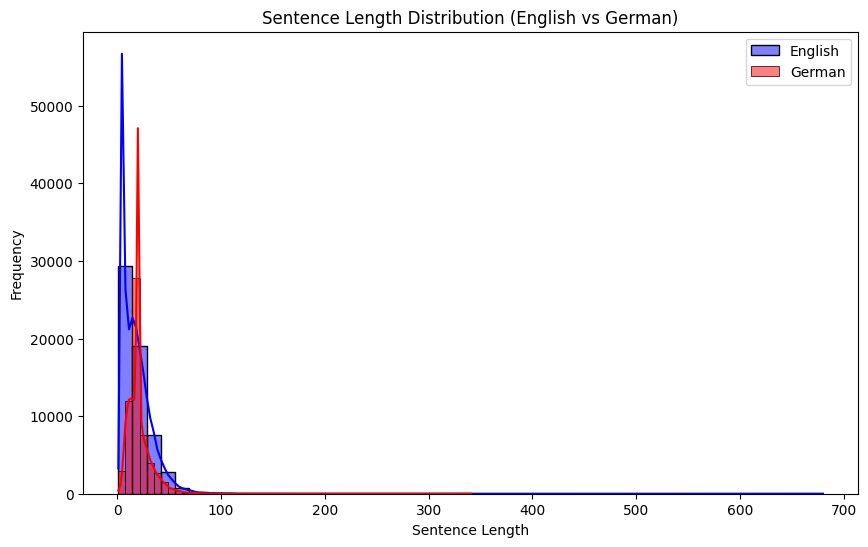

In [31]:
# Sentence Length Distribution
# Plot the distribution of sentence lengths for English and Hindi
plt.figure(figsize=(10, 6))
sns.histplot(data['English_Length'], kde=True, color='blue', label='English', bins=50)
sns.histplot(data['german_Length'], kde=True, color='red', label='German', bins=50)
plt.legend()
plt.title('Sentence Length Distribution (English vs German)')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Lowercase all characters
data['english']=data['english'].apply(lambda x: str(x))
data['german']=data['german'].apply(lambda x: str(x))
data['english']=data['english'].apply(lambda x: x.lower())
data['german']=data['german'].apply(lambda x: x.lower())

In [33]:
# Remove quotes
data['english']=data['english'].apply(lambda x: re.sub("'", '', x))
data['german']=data['german'].apply(lambda x: re.sub("'", '', x))

In [34]:
exclude = set(string.punctuation) # Set of all special characters

In [35]:
# Remove all the special characters
data['english']=data['english'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
data['german']=data['german'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [36]:
remove_digits = str.maketrans('', '', digits)

In [37]:
# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
data['english']=data['english'].apply(lambda x: x.translate(remove_digits))
data['german']=data['german'].apply(lambda x: x.translate(remove_digits))

# Remove extra spaces
data['english']=data['english'].apply(lambda x: x.strip())
data['german']=data['german'].apply(lambda x: x.strip())
data['english']=data['english'].apply(lambda x: re.sub(" +", " ", x))
data['german']=data['german'].apply(lambda x: re.sub(" +", " ", x))

In [38]:
data.dropna(inplace=True)
data=data.reset_index(drop=True)

In [39]:
data

,german,english,English_Length,german_Length
0,an der b befindet sich in loyermoor der so gen...,here the largest town of the district is locat...,19,20
1,ich begrüße die erklärung des herrn kommissar ...,i should like in passing to pay tribute to the...,38,29
2,das ist das gegenteil von dem was getan werden...,that is the opposite of what should be done an...,18,16
3,,,1,1
4,the ethnographical museum in varna is in a hou...,it was designed by the viennese architect rupp...,32,31
...,...,...,...,...
59977,öffentliche fördermittel für die grundlagenfor...,public funding of basic research,5,20
59978,öffentliche fördermittel für die grundlagenfor...,public funding of basic research,5,20
59979,öffentliche fördermittel für die grundlagenfor...,public funding of basic research,5,20
59980,öffentliche fördermittel für die grundlagenfor...,public funding of basic research,5,20


In [ ]:
# # Removing the rows that contains hindi sentences as it will just create noise in the dataset
# def contains_Hindi(text):
#     if isinstance(text,str):
#         return bool(re.search(r'[\u0900-\u097F]',text))
#     return False
# data=data[~data['english'].apply(contains_Hindi)].reset_index(drop=True)

In [ ]:
# # Removing the rows that contains English in hindi sentences as it will just create noise in the dataset
# def contains_eng(text):
#     if isinstance(text,str):
#         return bool(re.search(r'[a-zA-Z]', text))
#     return False
# data=data[~data['hindi'].apply(contains_eng)].reset_index(drop=True)

In [40]:
data.dropna(inplace=True)
data=data.reset_index(drop=True)

In [41]:
data = data[data['English_Length']<=10]
data = data[data['german_Length']<=10]


In [42]:
data.dropna(inplace=True)
data=data.reset_index(drop=True)

In [43]:
data

,german,english,English_Length,german_Length
0,,,1,1
1,es ist das bekannteste arabische bauwerk auf d...,its the most wellknown arab monument in the world,9,10
2,wie könnten eine soforthilfe und die unterstüt...,what could emergency and reconstruction aid co...,8,10
3,damit haben sie die skeptiker überzeugt,in this you have confounded the sceptics,7,6
4,im ersten verfahren war eine reihe von unregel...,a number of irregularities were apparent in th...,10,9
...,...,...,...,...
4989,unsere ahbzulassung gilt für die bfaindikation...,our ahb certificate covers bfa indications and a,9,9
4990,die besten designs werden mit geldpreisen präm...,the best designs will be awarded monetary prizes,8,7
4991,jede abweichende meinung ist verboten,any form of dissidence is forbidden,6,5
4992,ebenso wie das europäische parlament bedauern ...,like the european parliament we utterly deplor...,8,9


In [44]:
# Sentence Alignment Check (Basic Inspection)
# Check for sentence alignment issues by printing a few mismatched pairs
misaligned_pairs = data[data['English_Length'] != data['german_Length']]
print("Mismatched sentence pairs:\n\n", misaligned_pairs.head())

Mismatched sentence pairs:

                                               german  \
1  es ist das bekannteste arabische bauwerk auf d...   
2  wie könnten eine soforthilfe und die unterstüt...   
3            damit haben sie die skeptiker überzeugt   
4  im ersten verfahren war eine reihe von unregel...   
5  schriftlich fr der elektronische handel ist un...   

                                             english  English_Length  \
1  its the most wellknown arab monument in the world               9   
2  what could emergency and reconstruction aid co...               8   
3           in this you have confounded the sceptics               7   
4  a number of irregularities were apparent in th...              10   
5   in writing fr ecommerce is undeniably successful               8   

   german_Length  
1             10  
2             10  
3              6  
4              9  
5              9  


In [45]:
# Split the dataset into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Tokenization and preprocessing
def preprocess_data(data):
    """
    Preprocesses the English-german data into tokenized sentences.
    """
    english_sentences = data['english'].astype(str).tolist()
    hindi_sentences = data['german'].astype(str).tolist()
    return english_sentences, hindi_sentences

train_eng, train_ge = preprocess_data(train_data)
test_eng, test_ge = preprocess_data(test_data)

### **STATISTICAL MACHINE TRANSLATION (SMT) with IBM Model 2 from NLTK**
---

### IBM Model 2 for Machine Translation

**IBM Model 2** is a statistical machine translation model that builds upon **IBM Model 1** by incorporating **word reordering** into the translation process. It is part of the IBM alignment models introduced in the early 1990s to address the alignment problem in parallel corpora (bilingual text).

#### How it Works:
1. **Word Alignment**: IBM Model 2 aligns words between a source and target sentence probabilistically. For instance, in translating an English sentence to a Hindi sentence, the model determines the likelihood that a word in English aligns with a specific word in Hindi.

2. **Reordering**: IBM Model 2 introduces a **distortion probability** to account for word order differences between source and target languages. This allows the model to reorder words during translation, which improves over the naive assumptions of IBM Model 1.

3. **Translation Probability**:
   - A probability distribution \( t(f|e) \) is learned, where \( f \) is a target language word, and \( e \) is a source language word.
   - \( t(f|e) \) represents the likelihood of translating \( e \) to \( f \).

4. **Distortion Probability**:
   - A function \( d(j|i, l_s, l_t) \) calculates the probability that a word at position \( i \) in the source sentence aligns to position \( j \) in the target sentence.
   - \( l_s \) and \( l_t \) are the lengths of the source and target sentences, respectively.

#### Steps in Training IBM Model 2:
1. **Initialization**: The model starts with uniform probabilities or the output from IBM Model 1.
2. **Expectation-Maximization (EM) Algorithm**:
   - **Expectation Step**: Compute expected counts of word alignments and distortions using current probabilities.
   - **Maximization Step**: Update the translation probabilities \( t(f|e) \) and distortion probabilities \( d(j|i) \) using the expected counts.
3. **Iteration**: Repeat the EM steps over several iterations to improve alignment and probabilities.

---

#### Benefits of IBM Model 2:
- **Improved Word Reordering**: Unlike IBM Model 1, IBM Model 2 handles reordering, which is essential for languages with different syntactic structures (e.g., English-Hindi).
- **Probabilistic Alignment**: By learning probabilities, the model can align words even when they do not share direct one-to-one correspondence.

---

#### Example Flow:
1. **Input**: A parallel corpus with aligned sentences in English and Hindi.
2. **Training**: The model learns \( t(f|e) \) and \( d(j|i) \) over multiple iterations.
3. **Translation**: Given a new English sentence, the model uses the learned probabilities to align and reorder words into Hindi.

IBM Model 2 provides a foundational approach to statistical machine translation and serves as a stepping stone to more advanced alignment models like IBM Model 3 and 4.

In [46]:
print("\n--- Running Statistical Machine Translation (IBM Model 2) ---")

nltk.download('comtrans')  # Pretrained aligned data for demonstration


--- Running Statistical Machine Translation (IBM Model 2) ---


[nltk_data] Downloading package comtrans to /root/nltk_data...


True

In [47]:
# Prepare aligned sentences
aligned_sentences = [AlignedSent(e.split(), h.split()) for e, h in zip(train_eng, train_ge)]

In [48]:
aligned_sentences[:10]

[AlignedSent(['consequently', 'patents', 'are', 'an', 'uncontrollable', 'business', 'risk', 'to', 'them'], ['folglich', 'sind', 'patente', 'ein', 'unkontrollierbares', 'geschäftsrisiko', 'für', 'den', 'mittelstand'], Alignment([])),
 AlignedSent(['does', 'it', 'matter', 'which', 'fertiliser', 'you', 'use'], ['ist', 'die', 'art', 'des', 'düngers', 'ausschlaggebend'], Alignment([])),
 AlignedSent(['hastings', 'is', 'one', 'of', 'the', 'sunniest', 'places', 'in', 'new', 'zealand'], ['hastings', 'ist', 'einer', 'der', 'sonnigsten', 'orte', 'in', 'neuseeland'], Alignment([])),
 AlignedSent(['how', 'can', 'we', 'help', 'women'], ['wie', 'können', 'wir', 'frauen', 'helfen'], Alignment([])),
 AlignedSent(['conventional', 'energy', 'sources', 'and', 'energy', 'technology', 'vote'], ['konventionelle', 'energiequellen', 'und', 'energietechnologie', 'abstimmung'], Alignment([])),
 AlignedSent(['our', 'restored', 'cabins', 'are', 'very', 'comfortable'], ['sie', 'besitzen', 'eine', 'anheimelnde', 'a

In [49]:
print(f"Total sentences {len(aligned_sentences)}")

Total sentences 3995


In [50]:
# Train IBM Model 2
ibm_model = IBMModel2(aligned_sentences, 15)  # 15 iterations

In [51]:
# Align and Translate a test sentence
sample_eng = test_eng[10].split()
alignment = ibm_model.translation_table
translated_sentence = [max(alignment[word], key=alignment[word].get, default='') for word in sample_eng]
print("Original:", test_eng[10])
print("Translation (IBM Model 2):", ' '.join(translated_sentence))

Original: that is precisely what europe is doing
Translation (IBM Model 2): dass estil bemängelt course europa estil sc


In [52]:
import pickle

In [53]:
import pickle
import collections

# Function to recursively convert defaultdict to a normal dictionary
def convert_to_dict(obj):
    if isinstance(obj, collections.defaultdict):
        return {key: convert_to_dict(value) for key, value in obj.items()}
    elif isinstance(obj, dict):
        return {key: convert_to_dict(value) for key, value in obj.items()}
    elif isinstance(obj, float):  # Ensure floats are stored properly
        return float(obj)
    else:
        return obj  # Keep values like int or str as they are

# Extract translation and alignment probabilities in a serializable format
def save_ibm_model(ibm_model, filename="ibm_model2_eng_german.pkl"):
    # Convert translation table
    translation_table = convert_to_dict(ibm_model.translation_table)

    # Convert alignment table
    alignment_table = convert_to_dict(ibm_model.alignment_table)

    model_data = {
        "translation_table": translation_table,
        "alignment_table": alignment_table
    }

    with open(filename, "wb") as f:
        pickle.dump(model_data, f)

# Save the trained model
save_ibm_model(ibm_model)


In [54]:
# Load the trained model from file
def load_ibm_model(filename="ibm_model2_eng_german.pkl"):
    with open(filename, "rb") as f:
        model_data = pickle.load(f)
    return model_data["translation_table"]

# Function to translate English text using the loaded translation table
def translate_text(english_text, translation_table):
    words = english_text.lower().split()  # Tokenize input text
    translated_words = []

    for word in words:
        if word in translation_table:
            translations = translation_table[word]
            if translations:
                best_translation = max(translations, key=translations.get)  # Most probable word
                translated_words.append(best_translation)
            else:
                translated_words.append(word)  # Keep original word if no translation found
        else:
            translated_words.append(word)  # Keep original word if not in vocabulary

    return " ".join(translated_words)  # Return translated sentence


In [56]:

# Function to get user input and generate translation
# Load the trained translation table
translation_table = load_ibm_model()

# Get user input
english_text = input("Enter English text: ")

# Generate translation
translated_text = translate_text(english_text, translation_table)

print("Translated:", translated_text)


Enter English text: how are you
Translated: fehlermeldung sind ihnen
